# Example notebook using the event display for the IWCD mPMT CNN dataset

This notebook uses the IWCD geometry uses mPMTs, for the mPMT CNN dataset.

The same setup and code should work for other detectors using the mPMT CNN dataset, e.g. for WCTE, with minimal modifications.


Plot are included of example events in 2D and 3D, and plots of variables related to the detector geometry to check that the mapping to the CNN image appears correct.

## Imports and setup

First change some display settings for the notebook

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display, HTML, Markdown
display(HTML("<style>.container { width:100% !important; }</style>"))
display(HTML("<style>div.output_scroll { height: 44em; }</style>"))

In [3]:
import sys
import matplotlib
import matplotlib.pyplot as plt

In [4]:
# either add WatChMaL repository directory to PYTHONPATH environment variable or add it here
sys.path.append('/home/amisery/WatChMaL')
sys.path.append('/home/amisery')

External imports:

In [5]:
import torch
import numpy as np
import pandas as pd
from analysis.event_display.cnn_mpmt_event_display import CNNmPMTEventDisplay
from watchmal.model.sinkhornAE import Autoencoder
import main
from hydra.utils import instantiate, to_absolute_path
import hydra
from omegaconf import OmegaConf

/home/amisery/WatChMaL/analysis/__init__.py:4: UserWarning: WARNING: The git repository has uncommitted changes. Please commit changes before running WatChMaL code for proper version control
  print(f"Imported analysis code from WatChMaL repository with git version: {get_git_version(os.path.dirname(__file__))}")


Imported analysis code from WatChMaL repository with git version: 624e1bd-dirty


/home/amisery/WatChMaL/main.py:26: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path='config/', config_name='sae_train')


Import WatChMaL analysis code

In [6]:
"""
hydra.initialize(version_base=None, config_path="config/")
cfg = hydra.compose(config_path="config/", config_name = "sae_train")
print(OmegaConf.to_yaml(cfg))
"""

'\nhydra.initialize(version_base=None, config_path="config/")\ncfg = hydra.compose(config_path="config/", config_name = "sae_train")\nprint(OmegaConf.to_yaml(cfg))\n'

In [7]:
input_size = 128
num_classes = 4
img_size_x = 32
img_size_y = 40
in_channels = 1024
lat_dim = 128
img_channels = 1

state_dict_path = "/home/amisery/WatChMaL/outputs/2023-05-01/03-41-47/outputs/AutoencoderBEST.pth"
#state_dict_path = "/home/amisery/WatChMaL/outputs/2023-04-21/22-22-20/outputs/AutoencoderBEST.pth"
lat_path = "/home/amisery/WatChMaL/outputs/2023-05-01/03-41-47/outputs"
loss_path = "/home/amisery/WatChMaL/outputs/2023-05-01/03-41-47/outputs"

In [8]:
df_val = pd.read_csv(loss_path + "/log_val.csv")
df_train = pd.read_csv(loss_path + "/log_train_0.csv")

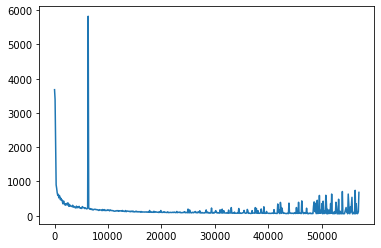

In [9]:
plt.plot(df_val["iteration"], df_val["sinkhorn_loss"])
#plt.plot(df_train["iteration"], df_train["loss"])

In [10]:
"""
df_val = df_val.loc[df_val["noise_gen_loss"]]
plt.plot(df_val["iteration"], df_val["mse_loss"], label = "MSE")
plt.title("Losses, log scale training")

plt.plot(df_val["iteration"],df_val["noise_gen_loss"], label = "Sinkhorn loss")
plt.legend()
"""

'\ndf_val = df_val.loc[df_val["noise_gen_loss"]]\nplt.plot(df_val["iteration"], df_val["mse_loss"], label = "MSE")\nplt.title("Losses, log scale training")\n\nplt.plot(df_val["iteration"],df_val["noise_gen_loss"], label = "Sinkhorn loss")\nplt.legend()\n'

In [11]:
"""
all_zs = np.load(lat_path +"/all_zs.npy", allow_pickle = True)
all_zs = np.vstack(all_zs)
all_labels = np.load(lat_path +"/labels.npy", allow_pickle = True)

all_zs.shape


import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import time
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from functools import reduce
zs_names = [ 'z_'+str(i) for i in range(all_zs.shape[1])]
lat_df = pd.DataFrame(all_zs,columns=zs_names)
lat_df['label'] = all_labels

df_sort = [lat_df.loc[lat_df["label"]==i].reset_index() for i in range(4)]
df_sort = [df.truncate(0,10000) for df in df_sort]
lat_df = df_sort[0]
print(lat_df)
for i in range(1,4):
    lat_df = pd.concat([lat_df,df_sort[i]])
print(lat_df)
print("starting_tsne")
tsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(lat_df[zs_names])

lat_df['tsne-2d-one'] = tsne_results[:,0]
lat_df['tsne-2d-two'] = tsne_results[:,1]



sns_plot = sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    data=lat_df,
    legend="full",
    alpha=0.3,
    hue="label",
    palette=sns.color_palette("hls", 4),
)
sns_plot.figure.savefig('tsne.png')

# Split the data into training and test sets
lat_df["label"] = lat_df["label"].astype(int)
X_train, X_test, y_train, y_test = train_test_split(lat_df[["tsne-2d-one","tsne-2d-two"]], lat_df["label"], test_size=0.2, random_state=42)

# Convert the dataframes to NumPy arrays
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values



# Define the model
model = AdaBoostClassifier()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
predictions = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")
"""

'\nall_zs = np.load(lat_path +"/all_zs.npy", allow_pickle = True)\nall_zs = np.vstack(all_zs)\nall_labels = np.load(lat_path +"/labels.npy", allow_pickle = True)\n\nall_zs.shape\n\n\nimport pandas as pd\nfrom sklearn.decomposition import PCA\nfrom sklearn.manifold import TSNE\nimport time\nimport seaborn as sns\nimport pandas as pd\nimport numpy as np\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import AdaBoostClassifier\nfrom functools import reduce\nzs_names = [ \'z_\'+str(i) for i in range(all_zs.shape[1])]\nlat_df = pd.DataFrame(all_zs,columns=zs_names)\nlat_df[\'label\'] = all_labels\n\ndf_sort = [lat_df.loc[lat_df["label"]==i].reset_index() for i in range(4)]\ndf_sort = [df.truncate(0,10000) for df in df_sort]\nlat_df = df_sort[0]\nprint(lat_df)\nfor i in range(1,4):\n    lat_df = pd.concat([lat_df,df_sort[i]])\nprint(lat_df)\nprint("starting_tsne")\ntsne = TSNE(n_components=2, verbose=0, perplexity=40, n_iter=300)\ntsne_results = tsne.fit_transfor

In [12]:
#model = instantiate(config.model)
model = Autoencoder(input_size,num_classes,img_size_x,img_size_y,in_channels,lat_dim,img_channels)

In [14]:
rec_dict = torch.load(state_dict_path, map_location=torch.device('cpu'))

In [15]:
model.load_state_dict(rec_dict["state_dict"])

<All keys matched successfully>

## Set up event display with dataset

The `CNNmPMTEventDisplay` initialiser is the same as the `CNNmPMTDataset` initialiser:

In [ ]:
help(CNNmPMTEventDisplay.__init__)

Create an instance:

In [16]:
event_display = CNNmPMTEventDisplay(h5file='/project/def-blairt2k/machine_learning/data/IWCD_mPMT_Short/IWCD_mPMT_Short_emgp0_E0to1000MeV_digihits.h5',
                                    mpmt_positions_file='/project/def-blairt2k/machine_learning/data/IWCD_mPMT_Short/IWCDshort_mPMT_image_positions.npz', collapse_arrays = True)

In [17]:
def log_scaling(data):
    log_max_global = np.log(1+event_display.global_max)
    return event_display.log_transform(data)/log_max_global

3


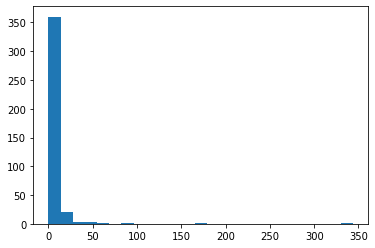

3


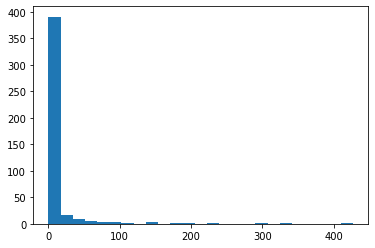

0


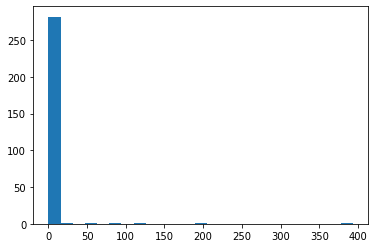

2


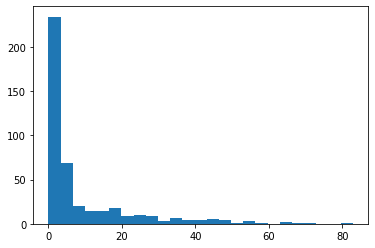

0


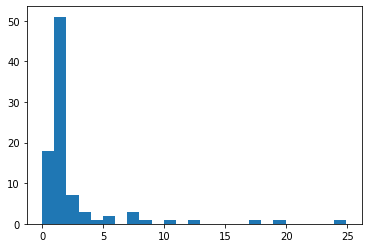

3


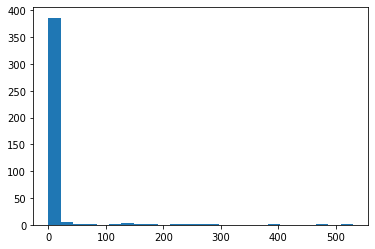

1


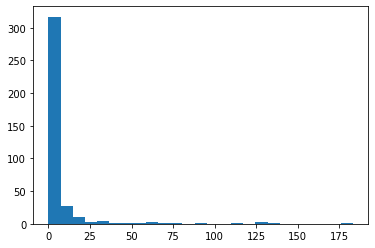

3


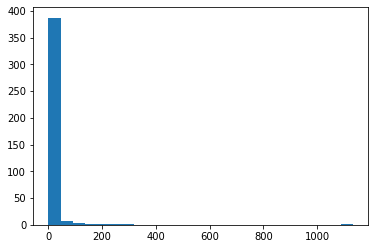

0


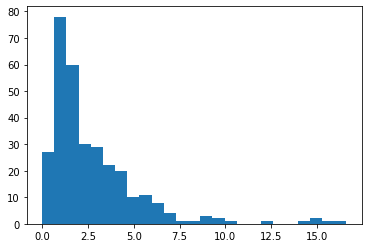

0


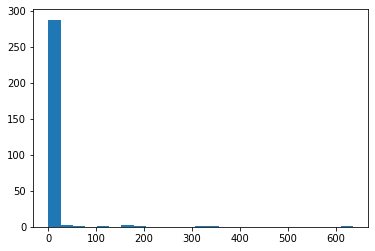

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

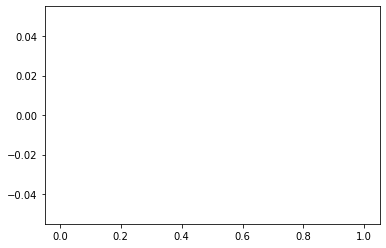

In [18]:
max_list = []
for j in range(10):
    i = np.random.randint(0,23481549)
    arr  = np.array(event_display[i]["data"]).flatten()
    print(event_display[i]["labels"])
    plt.hist(arr, bins=25, range = (0.0000001,np.max(arr)))
    plt.show()
    #max_list.append(torch.max(event_display.norm_event(event_display[j]["data"])).item())
plt.hist(max_list)

## Set up plotting style

Set the notebook's embedded figure format

In [20]:
%config InlineBackend.figure_formats = ['png']

Set some default matplotlib style settings

In [59]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 28}
matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (15, 12)
matplotlib.rcParams["figure.autolayout"] = True

## Display events

The 2D event display plots exactly the data produced by the Dataset class and passed to the CNN. How to use it:

In [ ]:
help(CNNmPMTEventDisplay.plot_event_2d)

In [46]:
def plot_group(elem,model):
    fig, axs = plt.subplots(1, 3, figsize=(15, 4))
    data = event_display.pad(elem["data"])
    
    out = model(data[None,:])
    label = elem["labels"]
    cond_vec = elem["cond_vec"]
    y_onehot = torch.FloatTensor(1, 4)
    y_onehot.zero_()
    cond_s = y_onehot.scatter_(1, torch.tensor([[label]]), 1)
    cond_s = torch.concat((cond_s,cond_vec[None,:]),dim=1)
    generated_noise = model.generate_noise(torch.rand(1, model.input_size),cond_s[0:1])
    example = model.generate(generated_noise)
    data = data.squeeze(0)
    idx = np.indices(data.shape)
    #axs[0].imshow(data.squeeze(0))
    #axs[1].imshow(out[0].detach().numpy().squeeze(0).squeeze(0))
    #axs[2].imshow(example.detach().numpy().squeeze(0).squeeze(0))
    axs[0].scatter(idx[1],idx[0], c = data, s = 15*np.log(1+data), cmap = "magma")
    axs[1].scatter(idx[1],idx[0], c = out[0].detach().numpy().squeeze(0).squeeze(0), s = 15*np.log(1+data), cmap = "magma")
    axs[2].scatter(idx[1],idx[0], c = example.detach().numpy().squeeze(0).squeeze(0), s = 15*np.log(1+data), cmap = "magma")
    plt.show()

For example, plotting event number 8 in both default and `dark_background` matplotlib styles:

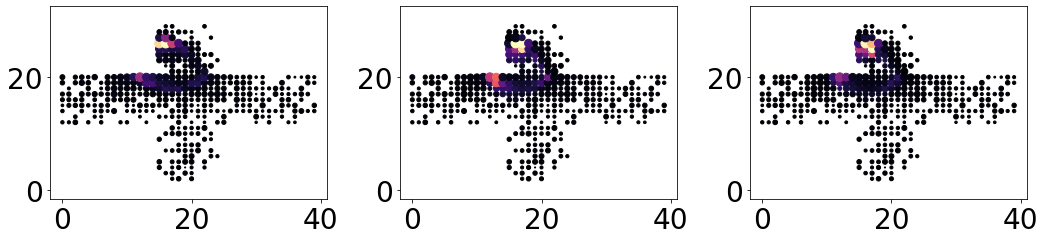

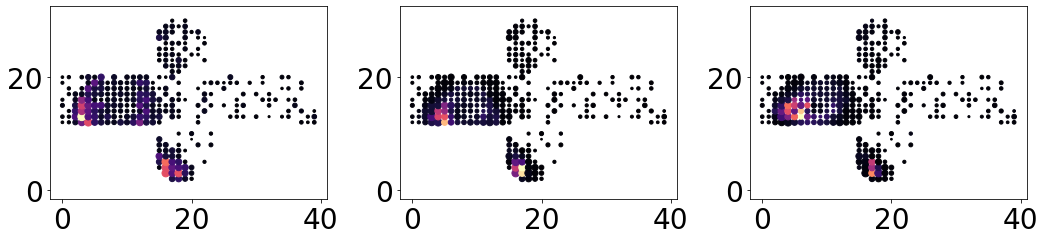

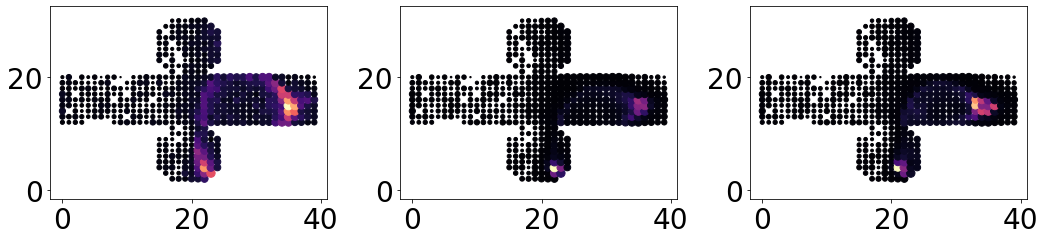

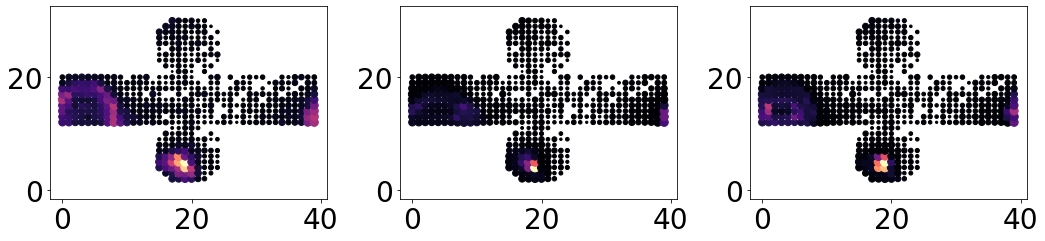

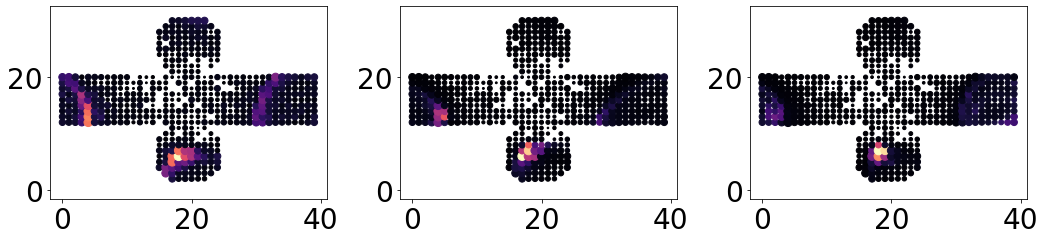

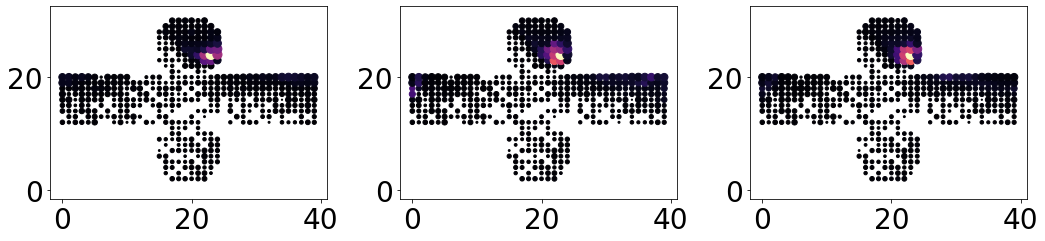

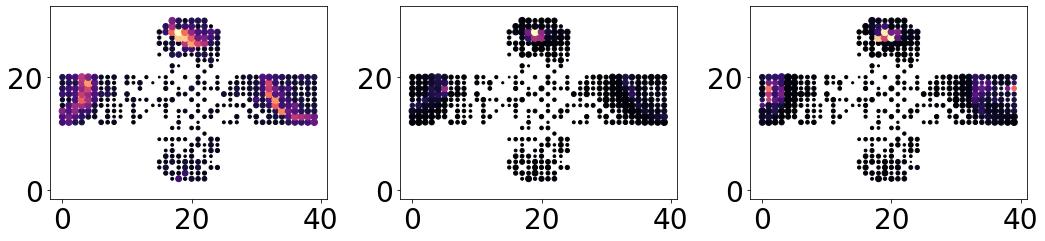

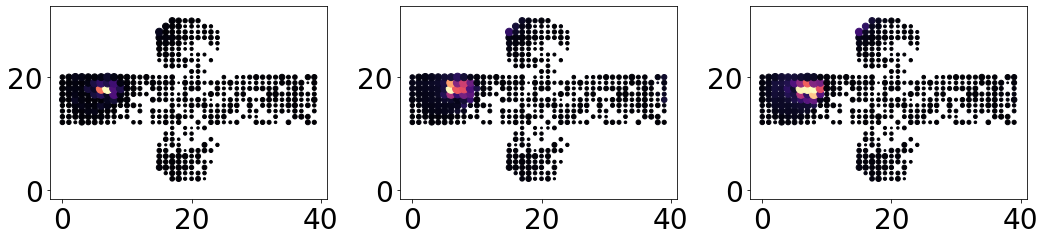

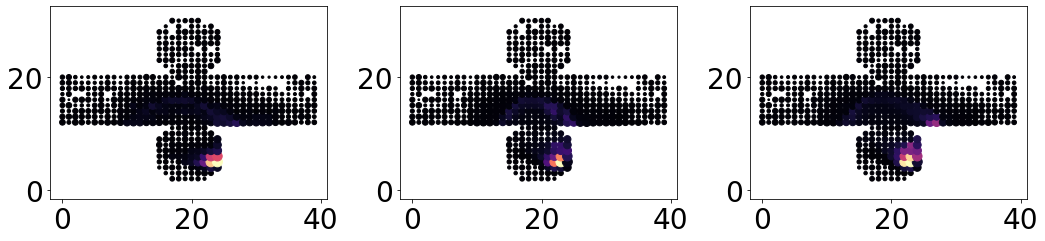

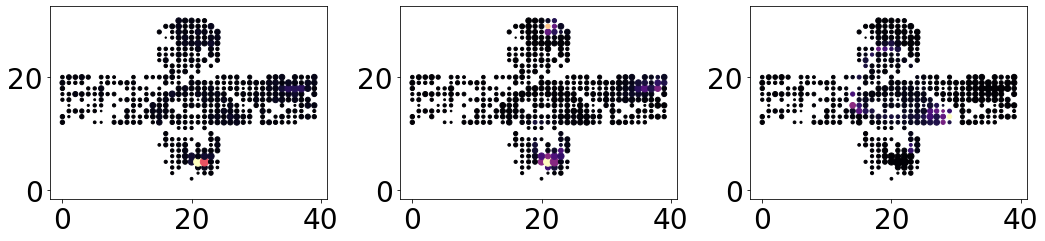

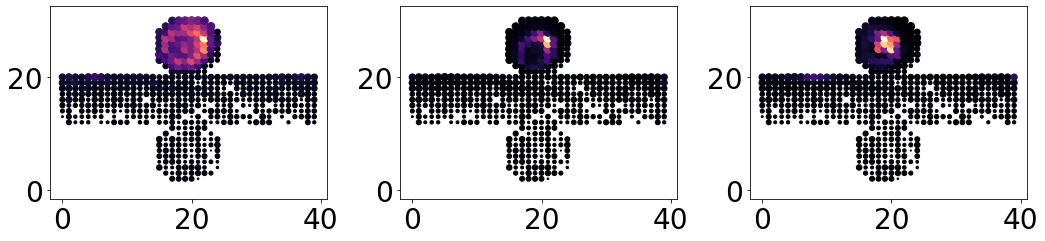

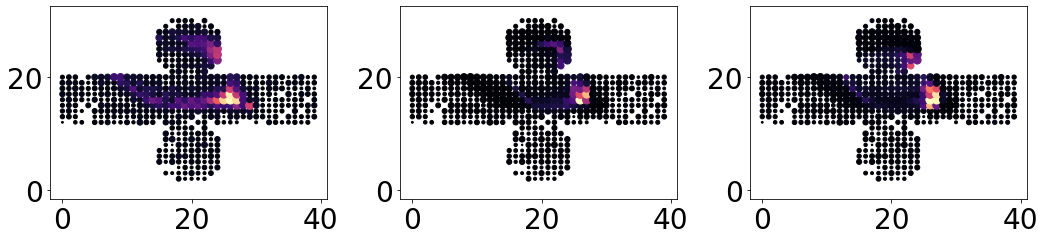

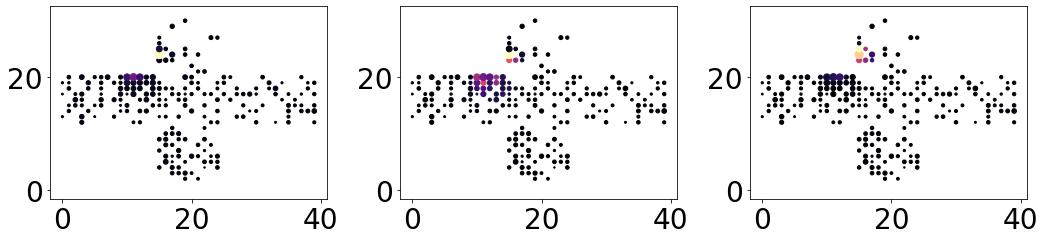

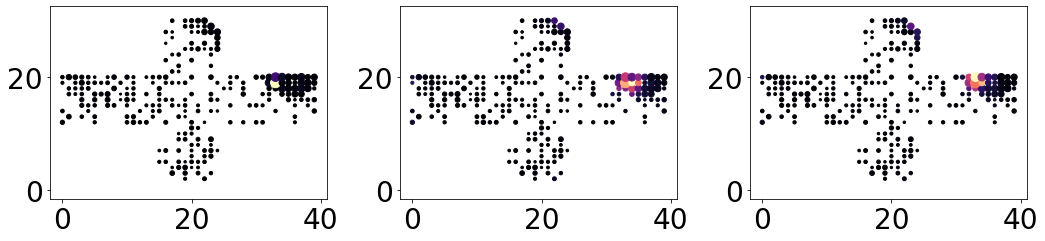

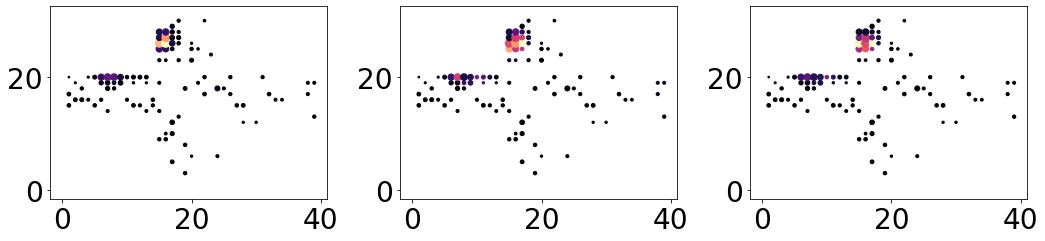

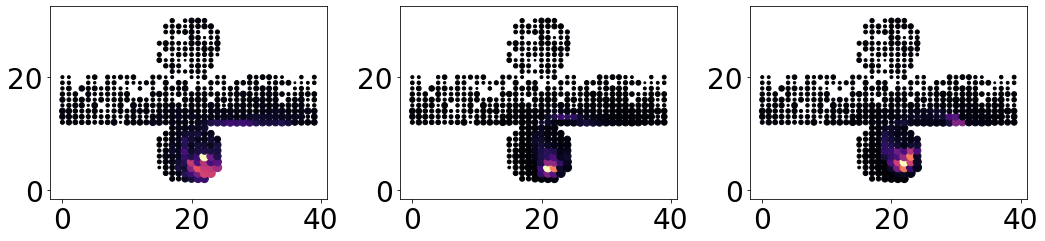

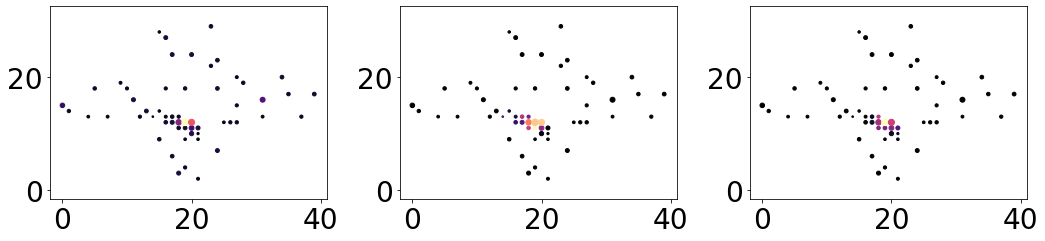

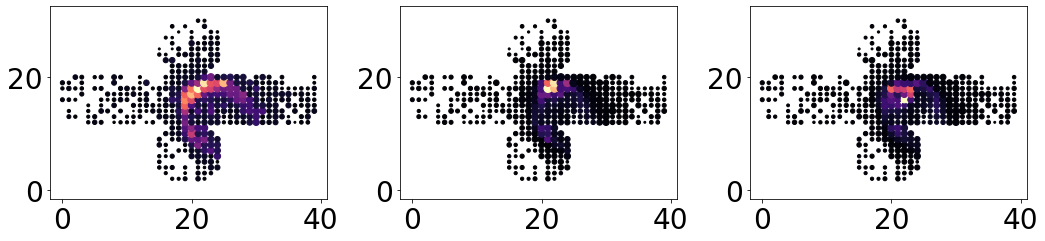

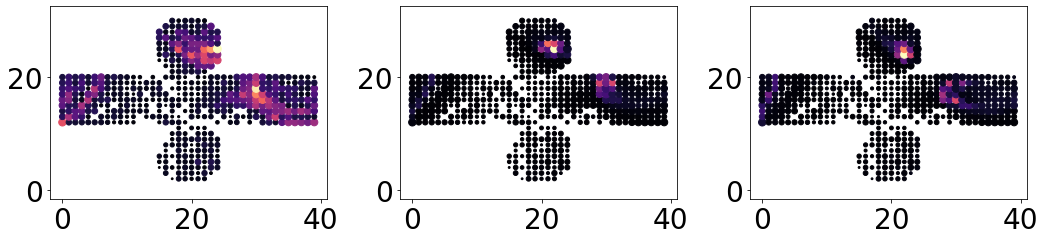

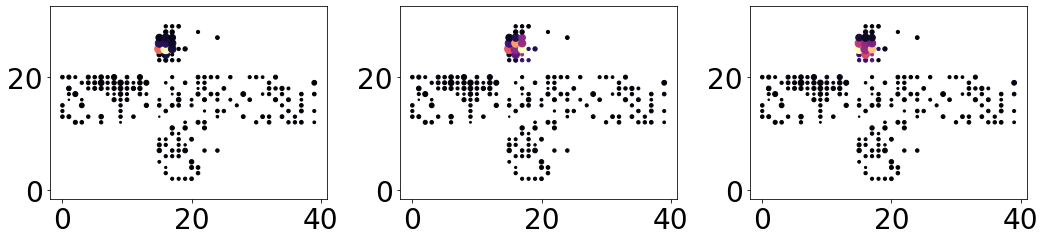

In [50]:
import numpy as np
from matplotlib.colors import LogNorm
for i in range(20):
    event_id_to_plot = np.random.randint(0,len(event_display))
    data = event_display.pad(event_display[event_id_to_plot]["data"])
    elem = event_display[event_id_to_plot]
    plot_group(elem,model)
   
    #ax = event_display.plot_processed_event_2d(event_id_to_plot, model, color_label="Charge", title=f"Event #{event_id_to_plot}", fig_size = 132)
    #ax = event_display.plot_diff_2d(event_id_to_plot, model, color_label="Charge", title=f"Event #{event_id_to_plot}", fig_size = 133)

    #ax = event_display.plot_generated_event_2d(event_id_to_plot, model, color_label="Charge", title=f"Event #{event_id_to_plot}",fig_size = 133)
    

In [58]:
all_zs = []
all_labels = []
for i in range(10000):
    event_id_to_plot = np.random.randint(0,len(event_display))
    elem = event_display[event_id_to_plot]
    label = elem["labels"]
    cond_vec = elem["cond_vec"]
    y_onehot = torch.FloatTensor(1, 4)
    y_onehot.zero_()
    cond_s = y_onehot.scatter_(1, torch.tensor([[label]]), 1)
    cond_s = torch.concat((cond_s,cond_vec[None,:]),dim=1)
    generated_noise = model.generate_noise(torch.rand(1, model.input_size),cond_s[0:1])
    all_zs.append(generated_noise.detach().numpy())
    all_labels.append(label)

In [52]:
from notebooks.tsne_clustering import TSNEclustering

In [60]:
clusters = TSNEclustering(np.array(all_zs).squeeze(1),np.array(all_labels))

In [61]:
clusters.perform_tsne()

starting_tsne


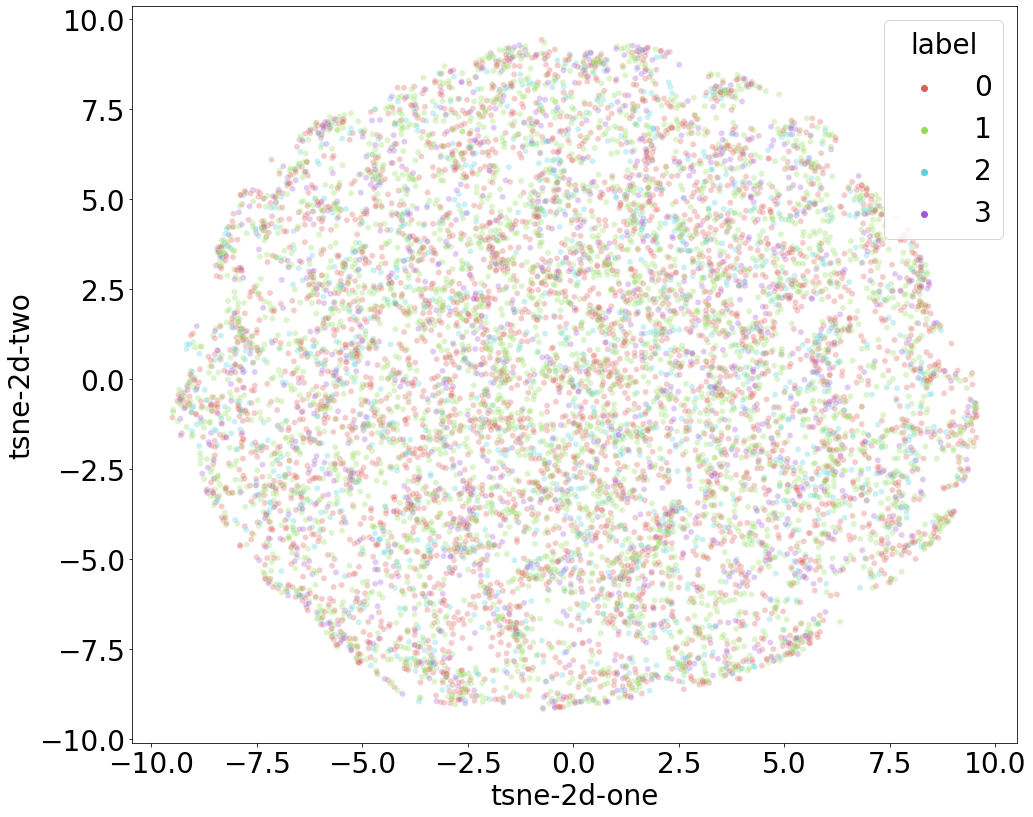

In [62]:
clusters.plot_result()

And with some transformations applied to the data before plotting:

In [ ]:
fig, ax = event_display.plot_event_2d(event_id_to_plot, color_label="Charge",
                                      title=f"Event #{event_id_to_plot} double cover",
                                      transformations="double_cover")
fig, ax = event_display.plot_event_2d(event_id_to_plot, color_label="Charge",
                                      title=f"Event #{event_id_to_plot} flipped horizontally and vertically",
                                      transformations=["horizontal_flip", "vertical_flip"])

Another version with different colour map on linear scale

In [ ]:
fig, ax = event_display.plot_event_2d(event_id_to_plot, color_label="Charge",
                                      title=f"Event #{event_id_to_plot} double cover",
                                      transformations="double_cover",
                                      style='dark_background',
                                      color_norm=None,
                                      color_map=matplotlib.pyplot.cm.turbo)

The 3D event display function takes the data and plots it in 3D instead. Note that this is not how the data is passed to the CNN, so is less useful for debugging the Dataset code, but stull useful for investigating the data itself.

In [ ]:
help(CNNmPMTEventDisplay.plot_event_3d)

Again, plotting event 8 in both styles:

In [ ]:
geo_positions_filename = "/fast_scratch/WatChMaL/data/geometries/geo_mPMTshort.npz"
fig, ax = event_display.plot_event_3d(event_id_to_plot, geo_positions_filename, color_label="Charge", title=f"Event #{event_id_to_plot}", view_azimuth=-120, view_elevation=30)
fig, ax = event_display.plot_event_3d(event_id_to_plot, geo_positions_filename, color_label="Charge", title=f"Event #{event_id_to_plot}", view_azimuth=-120, view_elevation=30, style="dark_background")

### Display the detector geometry
There are some extra functions for plotting various geometric quantities, to help debug the detaset:

In [ ]:
help(CNNmPMTEventDisplay.plot_geometry_2d)

In [ ]:
help(CNNmPMTEventDisplay.plot_geometry_3d)

In [ ]:
help(CNNmPMTEventDisplay.plot_geometry)

View the geometry in 2D to check the dataset is working:

In [ ]:
figs, axes = event_display.plot_geometry_2d(geo_positions_filename, plot=('1','i','x','y','z','dx','dy','dz','mx','my','mz','ir','ic','ch'))

View the geometry in 2D to check the geometry looks correct: 

In [ ]:
figs, axes = event_display.plot_geometry_3d(geo_positions_filename, plot=('1','i','x','y','z','dx','dy','dz','mx','my','mz','ir','ic','ch'))

View the geometry after transformation to check the transformation is working correctly:

In [ ]:
figs, axes = event_display.plot_geometry_2d(geo_positions_filename, plot=('i','x','y','z','mx','my','mz'), transformations="double_cover")

You can also make changes to the figure(s) returned by the plotting function.
Here we produce one plot, so take the first element of the returned list of figures and axes, remove the colorbar from the figure, make the axes visible, label them and set the padding so they don't overlap with the numbers.

In [ ]:
figs, axes = event_display.plot_geometry_3d(geo_positions_filename, plot=('1'), zoom=1, view_azimuth=-60)
fig, ax = figs[0], axes[0]  # it returns a list of figs and axes, but we take the first one since we only plotted one
for c in fig.get_children():
    if c.get_label()=="<colorbar>":
        c.remove()
ax.set_xlabel("x position [cm]")
ax.set_ylabel("y position [cm]")
ax.set_zlabel("z position [cm]")
ax.xaxis.labelpad=30
ax.yaxis.labelpad=30
ax.zaxis.labelpad=30
ax.set_axis_on()

--- Logging error ---
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 461, in dispatch_queue
    await self.process_one()
  File "/opt/conda/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 450, in process_one
    await dispatch(*args)
TypeError: object NoneType can't be used in 'await' expression

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/logging/__init__.py", line 1089, in emit
    self.flush()
  File "/opt/conda/lib/python3.8/logging/__init__.py", line 1069, in flush
    self.stream.flush()
BrokenPipeError: [Errno 32] Broken pipe
Call stack:
  File "/opt/conda/lib/python3.8/runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/opt/conda/lib/python3.8/runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.8/site-packages/ipykernel_laun